In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [47]:
from tensorflow.keras.datasets import mnist
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()


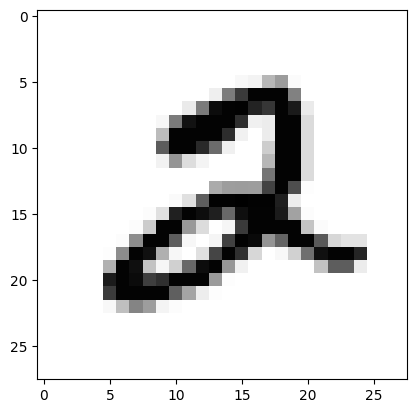

In [48]:
plt.imshow(X_train_data[5], cmap='Greys')
plt.show()

In [49]:
N = X_train_data.shape[0]

## Vectorisation

In [50]:
x_train = X_train_data.reshape(N, 28*28)
x_train.shape

(60000, 784)

## Normalisation

In [51]:
x_train = x_train/255

## codage de la valeur de sortie

In [52]:
Y_train = to_categorical(Y_train_data, num_classes=10)
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

## Preparation de la donnee de test

In [53]:
X_test = X_test_data.reshape(X_test_data.shape[0], 28*28)
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)


# Reseau de neuronne

In [54]:
model = Sequential()

# Premiere couche cachee    
model.add(Dense(8, activation='sigmoid', input_dim=28*28))

# Deuxieme couche cachee
model.add(Dense(8, activation='sigmoid'))

# Couche de sortie
model.add(Dense(10, activation='softmax'))

# Choix de l'optimiseur et de methode de descente de gradient


model.compile(loss='categorical_crossentropy',optimizer='sgd', metrics=['accuracy'])

print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 8)              │         6,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │            90 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,442 (25.16 KB)

 Trainable params: 6,442 (25.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [55]:
model.fit(x_train, Y_train, epochs=50, batch_size=32)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.1762 - loss: 2.2709
Epoch 2/50
 367/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2557 - loss: 2.2197

KeyboardInterrupt: 

## Evaluation du model

In [ ]:
resultat = model.evaluate(X_test, Y_test)
print("Perte sur le test : ", resultat[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9034 - loss: 0.3521
Perte sur le test :  0.3521457314491272


## Precision du model

In [ ]:
print('Precision sur les modet de test est' ,resultat[1])

Precision sur les modet de test est 0.9034000039100647


In [ ]:
prediction =  model.predict(X_test)
np.argmax(prediction[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.int64(7)

In [ ]:
Y_test_data[0]

np.uint8(7)

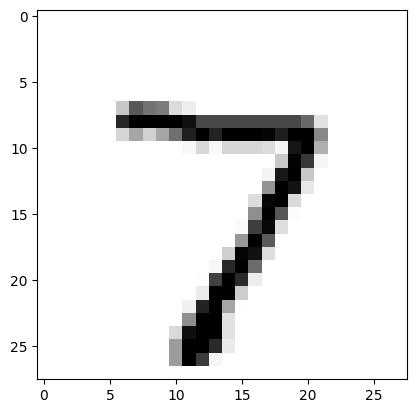

In [ ]:
plt.imshow(X_test_data[0] ,cmap='Greys')
plt.show()

# Fonction d'une variable


In [ ]:
def f(x):
    return np.cos(2*x) + np.sin(3*x) + np.sqrt(x) -2

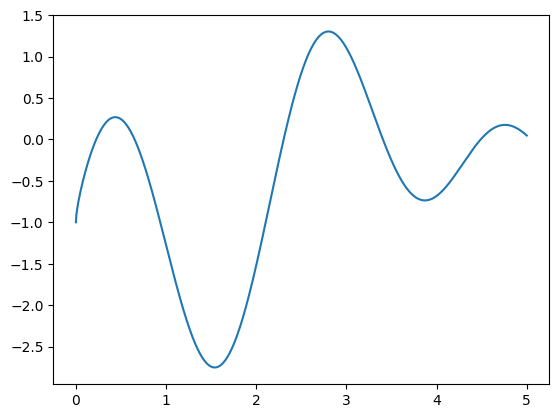

In [ ]:
x = np.linspace(0,5,1000)
y = f(x)
plt.plot(x,y)
plt.show()

In [56]:
x_tr = x.reshape(-1,1)
y_tr = y.reshape(-1,1)

modele = Sequential()


In [57]:
# Premiere couche cachee
modele.add(Dense(10 ,input_dim=1,activation='tanh'))

# Deuxieme couche cachee
modele.add(Dense(10 ,activation='tanh'))

#Troixieme couche cachee
modele.add(Dense(10 ,activation='tanh'))

#Quatrieme couche cachee
modele.add(Dense(10 ,activation='tanh'))

#Couche de sortie

modele.add(Dense(1,activation='linear'))


#Methode de gradient ,gradient personaliser

Mysgd = optimizers.SGD(learning_rate=0.001,decay=1e-7,momentum=0.9 ,nesterov=True)


modele.compile(loss='mean_squared_error',optimizer=Mysgd)
print(modele.summary())

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361 (1.41 KB)

 Trainable params: 361 (1.41 KB)

 Non-trainable params: 0 (0.00 B)

None


In [58]:
history = modele.fit(x_tr,y_tr,epochs=400,batch_size=50)

Epoch 1/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.3304
Epoch 2/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1630
Epoch 3/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1250 
Epoch 4/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.1033
Epoch 5/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0771 
Epoch 6/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0617
Epoch 7/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0389
Epoch 8/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0205 
Epoch 9/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0018
Epoch 10/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9891
Epoch 11/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9672
Epoch 12/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9480 
Epoch 13/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9261
Epoch 14/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9051
Epoch 15/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8839


# Visualisation

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


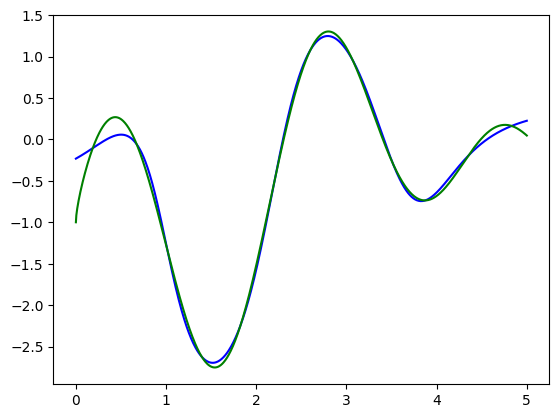

In [60]:
y_pred = modele.predict(x_tr)
plt.plot(x,y_pred,color = 'blue')
plt.plot(x,y_tr ,color='green')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step 


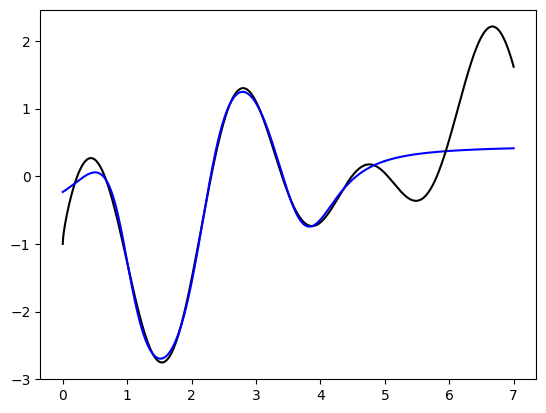

In [66]:
x_teste = np.linspace(5,7,100).reshape(-1,1)
y_predict = modele.predict(x_teste)

X = np.linspace(0,7,1100)
Y_true = f(X)

plt.plot(x_teste,y_predict,color='blue')
plt.plot(X,Y_true,color='black')
plt.plot(x,y_pred,color = 'blue')
plt.show()

In [64]:
np.linspace(5,7,100).reshape(1,-1).shape

(1, 100)

In [71]:
modele.get_weights()[2]

array([[ 0.15808012, -0.32994473, -0.20812461, -0.59859055,  0.5934001 ,
         0.81837904, -0.1057269 ,  0.16697966, -0.5725243 , -0.34547132],
       [-0.42871436,  0.14237463, -0.52987623, -0.5118463 ,  0.3930038 ,
        -0.6107962 ,  0.07282001,  0.6224883 , -0.06250104, -0.38456708],
       [-0.02699741,  0.55146646, -0.24491218,  0.04168246,  0.22320186,
         0.290473  ,  0.17023268,  0.59186983, -0.5428603 ,  0.14674772],
       [-0.07267283, -0.32193142, -0.11913744,  0.60184306,  0.06284163,
         0.05786621, -0.06406251,  0.06104567,  0.32696438, -0.29850543],
       [-0.38310584, -0.50608367,  0.27045825, -0.31034532,  0.1537946 ,
         0.20953223,  0.02598942, -0.49460104, -0.03725315, -0.4350608 ],
       [ 0.61316115,  0.11574985, -0.3711982 , -0.26863354, -0.44906455,
        -0.29131567,  0.6592062 ,  1.0960263 , -0.12741706, -0.36293188],
       [-0.24620503,  0.45152476, -0.5093966 , -0.01300886,  0.26718226,
         0.26832718, -0.18702127,  0.18453905

# Rerconnaissance d'image

In [72]:
from tensorflow.keras.datasets import cifar10

In [82]:
(X_train_2, Y_train_2), (X_test_2, Y_test_2) = cifar10.load_data()

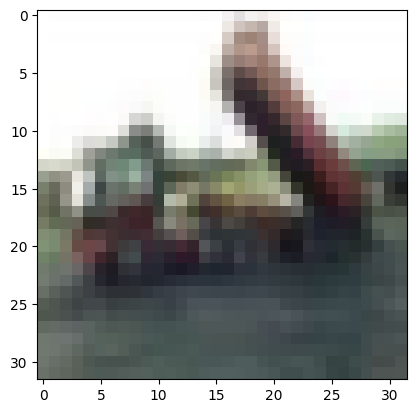

In [91]:
plt.imshow(X_train_2[2], cmap='Greys')
plt.show()

In [92]:
X_train = X_train_2.reshape(50000,32*32*3)
X_test = X_test_2.reshape(10000,32*32*3)
X_train = X_train/255
X_test = X_test/255
Y_train = to_categorical(Y_train_2,num_classes=10)
Y_test = to_categorical(Y_test_2,num_classes=10)


In [96]:
neuronne = Sequential()


# Premiere couche cachee
neuronne.add(Dense(30, input_dim=32*32*3, activation='sigmoid'))

# Deuxieme couche cachee
neuronne.add(Dense(30, activation='sigmoid'))

# Troisieme couche cachee
neuronne.add(Dense(30, activation='sigmoid'))

# Quatrieme couche cachee
neuronne.add(Dense(30, activation='sigmoid'))

# Couche de sortie
neuronne.add(Dense(10, activation='softmax'))

neuronne.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

e:\Data\script\venv\lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
print(neuronne.summary())

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_32 (Dense)                │ (None, 30)             │        92,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,290 (372.23 KB)

 Trainable params: 95,290 (372.23 KB)

 Non-trainable params: 0 (0.00 B)

None


In [98]:
neuronne.fit(X_train, Y_train, epochs=50, batch_size=50)

Epoch 1/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.1559 - loss: 2.1849
Epoch 2/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.1991 - loss: 2.0496
Epoch 3/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.2250 - loss: 2.0054
Epoch 4/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.2597 - loss: 1.9413
Epoch 5/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.2798 - loss: 1.9069
Epoch 6/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.2960 - loss: 1.8852
Epoch 7/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3042 - loss: 1.8704
Epoch 8/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3118 - loss: 1.8524
Epoch 9/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.3194 - loss: 1.8419
Epoch 10/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.3264 - loss: 1.8287
Epoch 11/50
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.3347 - loss: 1.8152
Epoch 12/50
1000/1000 

In [99]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [106]:
true = 0
false = 0
for (i,j) in zip(prediction, Y_test_2):
    if np.argmax(i) == j[0]:
        true += 1
    else:
        false += 1
print("Nombre de prédictions vraies : " + str(true))
print("Nombre de prédictions fausses : " + str(false))
print("Taux de réussite : " + str(true*100 / (true + false)) + " %")

Nombre de prédictions vraies : 4277
Nombre de prédictions fausses : 5723
Taux de réussite : 42.77 %


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


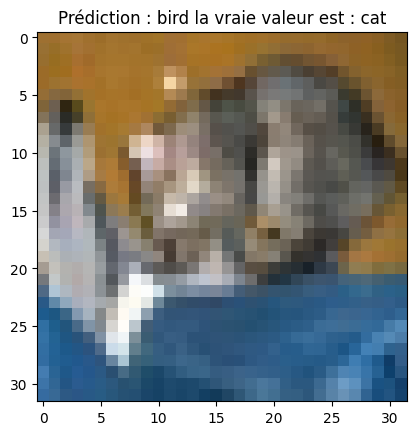

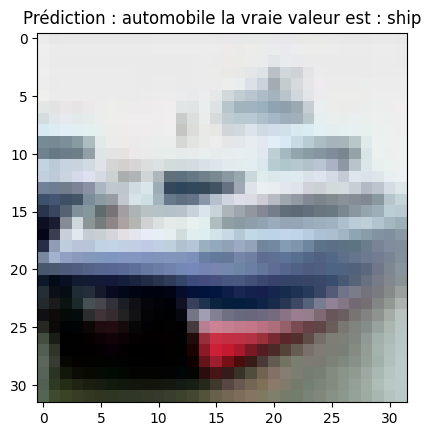

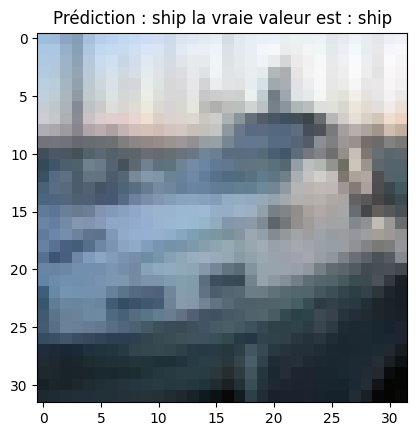

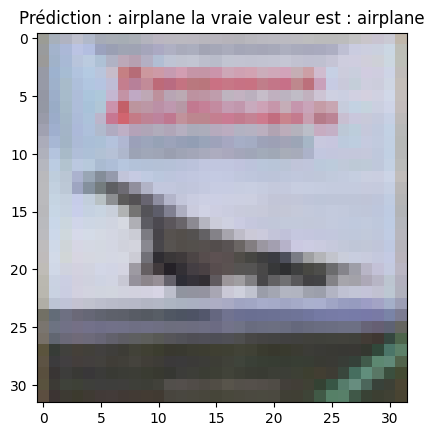

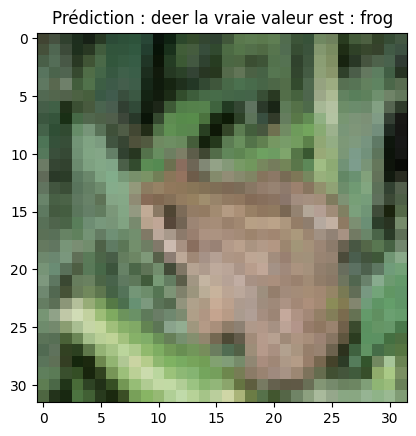

In [101]:
prediction = neuronne.predict(X_test)

for i in range(5):
    plt.imshow(X_test_2[i])
    plt.title("Prédiction : " + labels[np.argmax(prediction[i])] + " la vraie valeur est : " + labels[Y_test_2[i][0]])
    plt.show()
